In [7]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

In [8]:
#import dataset
data = pd.read_csv('/content/Ads_CTR_Optimisation.csv')
data

,Ad 1,Ad 2,Ad 3,Ad 4,Ad 5,Ad 6,Ad 7,Ad 8,Ad 9,Ad 10
0,1,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
9995,0,0,1,0,0,0,0,1,0,0
9996,0,0,0,0,0,0,0,0,0,0
9997,0,0,0,0,0,0,0,0,0,0
9998,1,0,0,0,0,0,0,1,0,0


In [9]:
data.head()

,Ad 1,Ad 2,Ad 3,Ad 4,Ad 5,Ad 6,Ad 7,Ad 8,Ad 9,Ad 10
0,1,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0


In [10]:
data.size

100000

In [11]:
#implement UCB
N = 10000
ad = 10
adSelected = []
numberSelected = [0] * ad
rewardSum = [0] * ad
totalReward = 0

for n in range(0, N):
  AD = 0
  maxUpperBound = 0
  for i in range(0, ad):
    if (numberSelected[i] > 0):
      avgReward = rewardSum[i]/numberSelected[i]
      delta = math.sqrt(3/2 * math.log(n+1)/numberSelected[i])
      upperBound = avgReward + delta

    else :
      upperBound = 1e400

    if (upperBound > maxUpperBound):
      maxUpperBound = upperBound
      AD = i

  adSelected.append(AD)
  numberSelected[AD] += 1
  reward = data.values[n, AD]
  rewardSum[AD] += reward
  totalReward += reward 

Text(0, 0.5, 'Number of selection of Ads')

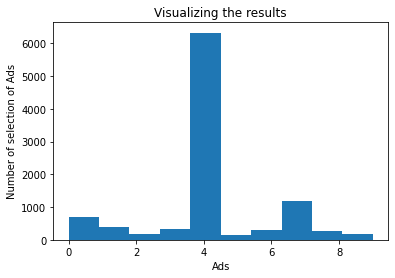

In [12]:
#visualize the result
plt.hist(adSelected)
plt.title('Visualizing the results')
plt.xlabel('Ads')
plt.ylabel('Number of selection of Ads')